In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive')

#inpath =  'C:/Users/Diego Torres/OneDrive - Universidad de los Andes/Trabajos/Machine Learning/Reclutamiento_&_Seleccion_CarlosPando/Bases/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
dataset = pd.read_excel(r'/content/gdrive/My Drive/Colab Notebooks/Base_modelos.xlsx',
                        index_col=0)
dataset.head(20)

,gender,education_level,major_discipline,recommended,applied_before,Vacant,disability,offered,experience,disab_lvl,Target
enrollee_id,,,,,,,,,,,
1,1,High School,Unknown,0,0,Coordinador de Contabilidad y Administración,0,0,1-2,No aplica,0
2,1,Phd,STEM,0,0,Operario/a,0,0,1-2,No aplica,0
4,1,Masters,STEM,0,1,Gerente Asistente de Planta de Incubación,0,0,1-2,No aplica,0
5,1,Masters,STEM,0,1,Coordinador de Contabilidad y Administración,0,0,<1,No aplica,0
7,1,Masters,STEM,1,1,Gerente Asistente de Planta de Incubación,0,0,<1,No aplica,0
8,0,Graduate,Humanities,0,0,Operario/a,0,0,2-5,No aplica,0
9,1,Graduate,STEM,0,0,Operario/a,0,0,2-5,No aplica,0
10,0,Graduate,STEM,0,0,Gerente de Planta de Incubacion,1,0,>5,medio,0
11,1,Primary School,Unknown,0,1,Operario/a,0,0,2-5,No aplica,0


In [ ]:
dataset.shape
#dataset.columns

(19158, 11)

In [ ]:
dataset.gender.unique()

array(['1', '0', 'Unknown', 'Other'], dtype=object)

In [ ]:
# X = dataset.drop('Vacant', axis =1)
# X


In [ ]:
X = dataset.iloc[:, 0:10].values #.values convierte el df a array
#X = X.iloc[:, 0:9].values #.values convierte el df a array
X

array([['1', 'High School', 'Unknown', ..., 0, '1-2', 'No aplica'],
       ['1', 'Phd', 'STEM', ..., 0, '1-2', 'No aplica'],
       ['1', 'Masters', 'STEM', ..., 0, '1-2', 'No aplica'],
       ...,
       ['1', 'Graduate', 'Other', ..., 0, '2-5', 'No aplica'],
       ['1', 'Graduate', 'STEM', ..., 0, '<1', 'No aplica'],
       ['1', 'Graduate', 'STEM', ..., 0, '2-5', 'No aplica']],
      dtype=object)

In [ ]:
y = dataset.iloc[:, 10].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.preprocessing import LabelEncoder


labelencoder_X0 = LabelEncoder()
X[:,0] = labelencoder_X0.fit_transform(X[:,0])
X_ = pd.DataFrame(X)
X_.head(10)

,0,1,2,3,4,5,6,7,8,9
0,1,High School,Unknown,0,0,Coordinador de Contabilidad y Administración,0,0,1-2,No aplica
1,1,Phd,STEM,0,0,Operario/a,0,0,1-2,No aplica
2,1,Masters,STEM,0,1,Gerente Asistente de Planta de Incubación,0,0,1-2,No aplica
3,1,Masters,STEM,0,1,Coordinador de Contabilidad y Administración,0,0,<1,No aplica
4,1,Masters,STEM,1,1,Gerente Asistente de Planta de Incubación,0,0,<1,No aplica
5,0,Graduate,Humanities,0,0,Operario/a,0,0,2-5,No aplica
6,1,Graduate,STEM,0,0,Operario/a,0,0,2-5,No aplica
7,0,Graduate,STEM,0,0,Gerente de Planta de Incubacion,1,0,>5,medio
8,1,Primary School,Unknown,0,1,Operario/a,0,0,2-5,No aplica
9,1,Graduate,STEM,0,0,Coordinador de Contabilidad y Administración,0,0,1-2,No aplica


In [ ]:
#X_.0.unique()

SyntaxError: ignored

In [ ]:
labelencoder_X1 = LabelEncoder()
X[:,1] = labelencoder_X1.fit_transform(X[:,1])
X_ = pd.DataFrame(X)
X_.head(10)


,0,1,2,3,4,5,6,7,8,9
0,1,1,Unknown,0,0,Coordinador de Contabilidad y Administración,0,0,1-2,No aplica
1,1,3,STEM,0,0,Operario/a,0,0,1-2,No aplica
2,1,2,STEM,0,1,Gerente Asistente de Planta de Incubación,0,0,1-2,No aplica
3,1,2,STEM,0,1,Coordinador de Contabilidad y Administración,0,0,<1,No aplica
4,1,2,STEM,1,1,Gerente Asistente de Planta de Incubación,0,0,<1,No aplica
5,0,0,Humanities,0,0,Operario/a,0,0,2-5,No aplica
6,1,0,STEM,0,0,Operario/a,0,0,2-5,No aplica
7,0,0,STEM,0,0,Gerente de Planta de Incubacion,1,0,>5,medio
8,1,4,Unknown,0,1,Operario/a,0,0,2-5,No aplica
9,1,0,STEM,0,0,Coordinador de Contabilidad y Administración,0,0,1-2,No aplica


In [ ]:
labelencoder_X2 = LabelEncoder()
X[:,2] = labelencoder_X2.fit_transform(X[:,2])
X_ = pd.DataFrame(X)
X_.head(10)

,0,1,2,3,4,5,6,7,8,9
0,1,1,6,0,0,Coordinador de Contabilidad y Administración,0,0,1-2,No aplica
1,1,3,5,0,0,Operario/a,0,0,1-2,No aplica
2,1,2,5,0,1,Gerente Asistente de Planta de Incubación,0,0,1-2,No aplica
3,1,2,5,0,1,Coordinador de Contabilidad y Administración,0,0,<1,No aplica
4,1,2,5,1,1,Gerente Asistente de Planta de Incubación,0,0,<1,No aplica
5,0,0,2,0,0,Operario/a,0,0,2-5,No aplica
6,1,0,5,0,0,Operario/a,0,0,2-5,No aplica
7,0,0,5,0,0,Gerente de Planta de Incubacion,1,0,>5,medio
8,1,4,6,0,1,Operario/a,0,0,2-5,No aplica
9,1,0,5,0,0,Coordinador de Contabilidad y Administración,0,0,1-2,No aplica


In [ ]:
labelencoder_X5 = LabelEncoder()
X[:,5] = labelencoder_X5.fit_transform(X[:,5])
X_ = pd.DataFrame(X)
X_.head(10)

,0,1,2,3,4,5,6,7,8,9
0,1,1,6,0,0,5,0,0,1-2,No aplica
1,1,3,5,0,0,14,0,0,1-2,No aplica
2,1,2,5,0,1,9,0,0,1-2,No aplica
3,1,2,5,0,1,5,0,0,<1,No aplica
4,1,2,5,1,1,9,0,0,<1,No aplica
5,0,0,2,0,0,14,0,0,2-5,No aplica
6,1,0,5,0,0,14,0,0,2-5,No aplica
7,0,0,5,0,0,12,1,0,>5,medio
8,1,4,6,0,1,14,0,0,2-5,No aplica
9,1,0,5,0,0,5,0,0,1-2,No aplica


In [ ]:
labelencoder_X8 = LabelEncoder()
X[:,8] = labelencoder_X8.fit_transform(X[:,8])
X_ = pd.DataFrame(X)
X_.head(10)


# labelencoder_X7 = LabelEncoder()
# X[:,7] = labelencoder_X7.fit_transform(X[:,7])
# X_ = pd.DataFrame(X)
# X_.head(10)

,0,1,2,3,4,5,6,7,8,9
0,1,1,6,0,0,5,0,0,0,No aplica
1,1,3,5,0,0,14,0,0,0,No aplica
2,1,2,5,0,1,9,0,0,0,No aplica
3,1,2,5,0,1,5,0,0,2,No aplica
4,1,2,5,1,1,9,0,0,2,No aplica
5,0,0,2,0,0,14,0,0,1,No aplica
6,1,0,5,0,0,14,0,0,1,No aplica
7,0,0,5,0,0,12,1,0,3,medio
8,1,4,6,0,1,14,0,0,1,No aplica
9,1,0,5,0,0,5,0,0,0,No aplica


In [ ]:
labelencoder_X9 = LabelEncoder()
X[:,9] = labelencoder_X9.fit_transform(X[:,9])
X_ = pd.DataFrame(X)
X_.head(10)

# labelencoder_X8 = LabelEncoder()
# X[:,8] = labelencoder_X8.fit_transform(X[:,8])
# X_ = pd.DataFrame(X)
# X_.head(10)

,0,1,2,3,4,5,6,7,8,9
0,1,1,6,0,0,5,0,0,0,0
1,1,3,5,0,0,14,0,0,0,0
2,1,2,5,0,1,9,0,0,0,0
3,1,2,5,0,1,5,0,0,2,0
4,1,2,5,1,1,9,0,0,2,0
5,0,0,2,0,0,14,0,0,1,0
6,1,0,5,0,0,14,0,0,1,0
7,0,0,5,0,0,12,1,0,3,2
8,1,4,6,0,1,14,0,0,1,0
9,1,0,5,0,0,5,0,0,0,0


In [ ]:
X.shape

(19158, 10)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 421)
#X_train, X_test, Y_train, Y_test = train_test_split(X2,y, test_size = 0.3, random_state = 421)


In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
sX = StandardScaler()
X_train = sX.fit_transform(X_train)
X_test = sX.transform(X_test)
X_train_df = pd.DataFrame(X_train)
X_train_df

,0,1,2,3,4,5,6,7,8,9
0,-0.451224,-0.678435,0.132569,-0.653143,-0.736387,1.139268,-0.230763,-0.335126,0.855304,-0.212863
1,-0.451224,-0.678435,-3.631854,-0.653143,-0.736387,-0.930220,-0.230763,2.983955,1.811825,-0.212863
2,1.734009,-0.678435,0.132569,-0.653143,-0.736387,-1.551067,-0.230763,-0.335126,-1.057736,-0.212863
3,-0.451224,0.166537,1.073675,-0.653143,-0.736387,0.104524,-0.230763,-0.335126,-1.057736,-0.212863
4,-0.451224,0.166537,1.073675,-0.653143,-0.736387,1.139268,-0.230763,-0.335126,-0.101216,-0.212863
...,...,...,...,...,...,...,...,...,...,...
13405,-0.451224,1.011509,0.132569,1.531058,-0.736387,0.725370,-0.230763,-0.335126,0.855304,-0.212863
13406,1.734009,1.011509,0.132569,-0.653143,-0.736387,-1.551067,-0.230763,2.983955,0.855304,-0.212863
13407,1.734009,1.011509,0.132569,-0.653143,-0.736387,0.311473,-0.230763,-0.335126,1.811825,-0.212863
13408,-0.451224,1.011509,0.132569,-0.653143,1.357982,-0.309374,-0.230763,-0.335126,0.855304,-0.212863


In [ ]:
#compile??z

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer


# # gender
# transformer = ColumnTransformer(
#     transformers=[
#         ("Reclutamiento_Seleccion",        # Un nombre de la transformación
#          OneHotEncoder(categories='auto'), # La clase a la que transformar
#          [0]            # Las columnas a transformar: gender.
#          )
#     ], remainder='passthrough'
# )

# X2 = transformer.fit_transform(X)
# X2 = pd.DataFrame(X2)
# X2 = X2.iloc[:, 1:] # Eliminamos una de las dummies
# X2.head(10)

# # X2.columns
# # X2[6].unique()

In [ ]:
# # education_level
# transformer = ColumnTransformer(
#     transformers=[
#         ("Reclutamiento_Seleccion",        # Un nombre de la transformación
#          OneHotEncoder(categories='auto'), # La clase a la que transformar
#          [5]            # Las columnas a transformar: education_level.
#          )
#     ], remainder='passthrough'
# )

# X2 = transformer.fit_transform(X2)
# X2 = pd.DataFrame(X2)
# X2
# X2 = X2.iloc[:, 1:] # Eliminamos una de las dummies
# X2.head(10)

In [ ]:
# # major_discipline
# transformer = ColumnTransformer(
#     transformers=[
#         ("Reclutamiento_Seleccion",        # Un nombre de la transformación
#          OneHotEncoder(categories='auto'), # La clase a la que transformar
#          [8]            # Las columnas a transformar: major_discipline.
#          )
#     ], remainder='passthrough'
# )

# X2 = transformer.fit_transform(X2)
# X2 = pd.DataFrame(X2)
# X2
# X2 = X2.iloc[:, 1:] # Eliminamos una de las dummies
# X2.head(10)

In [ ]:
# # Vacant
# transformer = ColumnTransformer(
#     transformers=[
#         ("Reclutamiento_Seleccion",        # Un nombre de la transformación
#          OneHotEncoder(categories='auto'), # La clase a la que transformar
#          [16]            # Las columnas a transformar: Vacant.
#          )
#     ], remainder='passthrough'
# )

# X2 = transformer.fit_transform(X2)
# X2 = pd.DataFrame(X2)
# X2
# X2 = X2.iloc[:, 1:] # Eliminamos una de las dummies
# X2.head(10)
# #'Vacant',  'experience','disab_lvl'

In [ ]:
# # experience
# transformer = ColumnTransformer(
#     transformers=[
#         ("Reclutamiento_Seleccion",        # Un nombre de la transformación
#          OneHotEncoder(categories='auto'), # La clase a la que transformar
#          [18]            # 33 con vacante.
#          )
#     ], remainder='passthrough'
# )

# X2 = transformer.fit_transform(X2)
# X2 = pd.DataFrame(X2)
# X2
# X2 = X2.iloc[:, 1:] # Eliminamos una de las dummies
# X2.head(10)
# #'Vacant',  'experience','disab_lvl'

In [ ]:
# # disab_lvl
# transformer = ColumnTransformer(
#     transformers=[
#         ("Reclutamiento_Seleccion",        # Un nombre de la transformación
#          OneHotEncoder(categories='auto'), # La clase a la que transformar
#          [21]            # 36 con Vacant.
#          )
#     ], remainder='passthrough'
# )

# X2 = transformer.fit_transform(X2)
# # X2 = pd.DataFrame(X2)

# X2 = X2[:, 1:] # Eliminamos una de las dummies
# X2.shape
# #X2.head(10)
# # Termina en 24 columnas

In [ ]:
#construimos nuestra red neuronal
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

clf = Sequential()

#primera capa
clf.add(Dense(units = 10,kernel_initializer = "uniform", activation = "relu", input_dim = 10))
#clf.add(Dense(units = 10,kernel_initializer = "uniform", activation = "relu", input_dim = 24)) # input_dim numero de campos que entran a la red neuronal
clf.add(Dropout(rate=0.8))

#segunda capa
clf.add(Dense(units = 4,kernel_initializer = "uniform", activation = "relu"))
clf.add(Dropout(rate=0.8))

#tercera capa
clf.add(Dense(units = 1,kernel_initializer = "uniform", activation = "sigmoid"))

#compilador de la RNA
clf.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ['accuracy', 'mse'])


from keras.callbacks import EarlyStopping
#early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights=True)


hist = clf.fit(X_train, y_train, batch_size = 10, epochs = 40, validation_data=(X_test,y_test), verbose=1) #,
               #callbacks = [early_stop])
hist

Epoch 1/40
1341/1341 [==============================] - 5s 3ms/step - loss: 0.4040 - accuracy: 0.9248 - mse: 0.1275 - val_loss: 0.1820 - val_accuracy: 0.9259 - val_mse: 0.0531
Epoch 2/40
1341/1341 [==============================] - 4s 3ms/step - loss: 0.2769 - accuracy: 0.9249 - mse: 0.0786 - val_loss: 0.1665 - val_accuracy: 0.9259 - val_mse: 0.0538
Epoch 3/40
1341/1341 [==============================] - 3s 3ms/step - loss: 0.2403 - accuracy: 0.9249 - mse: 0.0679 - val_loss: 0.1664 - val_accuracy: 0.9259 - val_mse: 0.0563
Epoch 4/40
1341/1341 [==============================] - 4s 3ms/step - loss: 0.2359 - accuracy: 0.9249 - mse: 0.0668 - val_loss: 0.1696 - val_accuracy: 0.9259 - val_mse: 0.0580
Epoch 5/40
1341/1341 [==============================] - 4s 3ms/step - loss: 0.2341 - accuracy: 0.9249 - mse: 0.0665 - val_loss: 0.1710 - val_accuracy: 0.9259 - val_mse: 0.0586
Epoch 6/40
1341/1341 [==============================] - 3s 3ms/step - loss: 0.2326 - accuracy: 0.9249 - mse: 0.0663 - va

In [ ]:
#hist.history

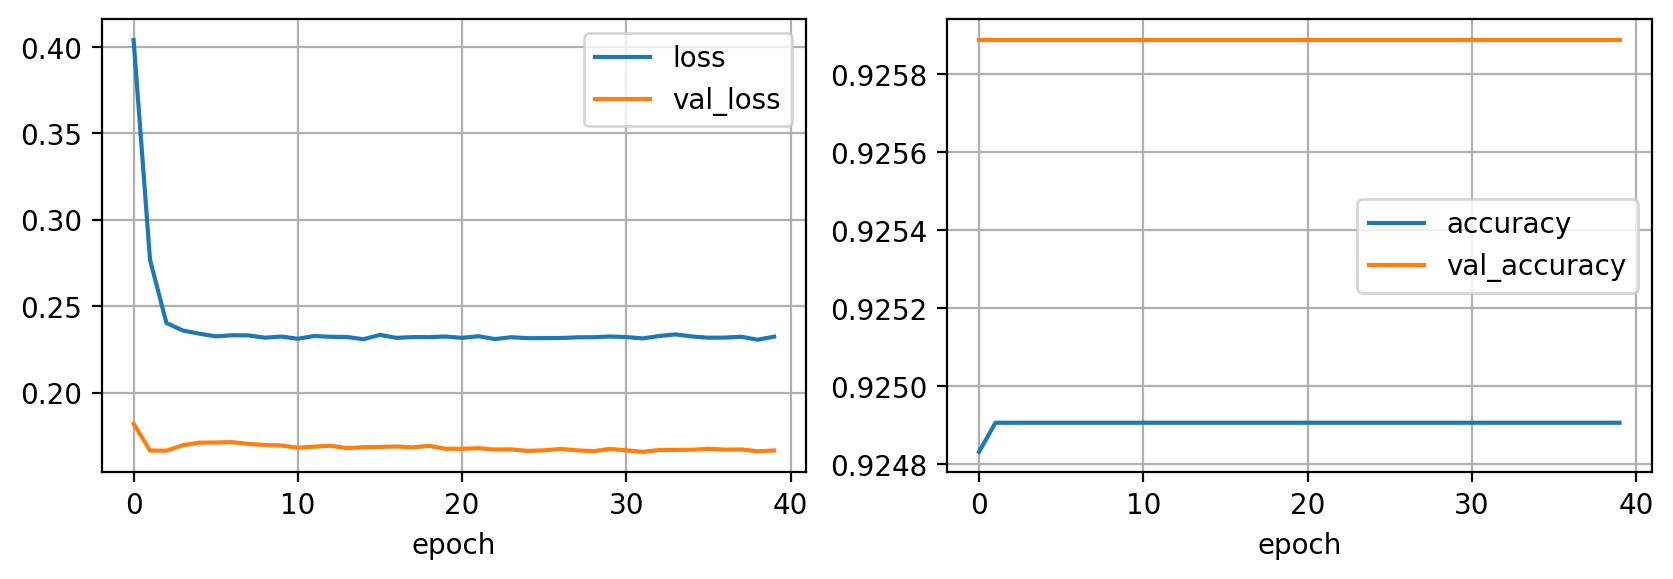

In [ ]:
fig = plt.figure(dpi=200, figsize=(10,3))
ax = plt.subplot(121)
hist1 = pd.DataFrame(hist.history)
hist1['epoch'] = range(len(hist1))
hist1.plot(x='epoch', y=['loss', 'val_loss'], grid=True, ax=ax)
ax = plt.subplot(122)
hist1.plot(x='epoch', y=['accuracy', 'val_accuracy'], grid=True, ax=ax)
plt.show()

In [ ]:
%matplotlib inline
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#predecir
y_pred = clf.predict(X_test)
y_pred

180/180 [==============================] - 0s 1ms/step


array([[1.18275926e-01],
       [9.54729512e-06],
       [3.53588111e-05],
       ...,
       [1.15200893e-09],
       [1.46747179e-05],
       [6.44725049e-04]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

y_pred = (y_pred>0.1)
y_pred

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print((cm[0][0]+cm[1][1])/cm.sum())

print(f'Accuracy = {accuracy_score(y_test,y_pred):.2f}\nRecall = {recall_score(y_test,y_pred):.4f}\n')

0.9511134307585247
Accuracy = 0.95
Recall = 0.9883



Confusion matrix, without normalization
[[5046  276]
 [   5  421]]


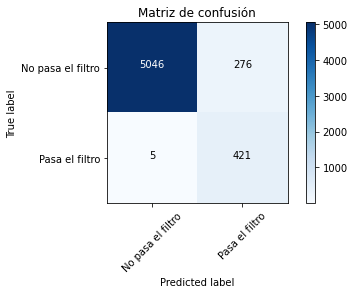

In [ ]:
plot_confusion_matrix(cm, ['No pasa el filtro','Pasa el filtro'],title='Matriz de confusión')

### Machine Learning Algorithms

Broadly, there are 3 types of Machine Learning Algorithms

(A) Supervised Learning

This algorithm consist of a target / outcome variable (or dependent variable) which is to be predicted from a given set of predictors (independent variables). Using these set of variables, we generate a function that map inputs to desired outputs. The training process continues until the model achieves a desired level of accuracy on the training data. Examples of Supervised Learning: Regression, Decision Tree, Random Forest, KNN, Logistic Regression etc.

(B) Unsupervised Learning

In this algorithm, we do not have any target or outcome variable to predict / estimate. It is used for clustering population in different groups, which is widely used for segmenting customers in different groups for specific intervention. Examples of Unsupervised Learning are Apriori algorithm, K-means, ...

(C) Reinforcement Learning:

Using this algorithm, the machine is trained to make specific decisions. It works this way: the machine is exposed to an environment where it trains itself continually using trial and error. This machine learns from past experience and tries to capture the best possible knowledge to make accurate business decisions. Example of Reinforcement Learning such as Markov Decision Process.

In this Notebook, we will apply some commonly used machine learning algorithms, these algorithms can be applied to almost any data problem.

Accuracy = 1.00
Recall = 0.9765

Confusion matrix, without normalization
[[5315    7]
 [  10  416]]


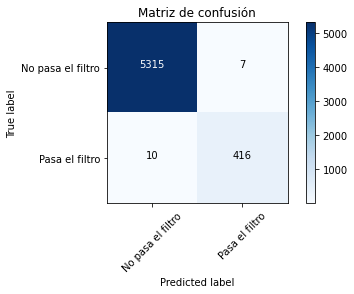

In [ ]:
########################################################################
#########          Random Forest

from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

# Train
model = RandomForestClassifier(random_state=421)
model.fit(X_train, y_train)
preds = model.predict(X_test)


# Evaluate
print(f'Accuracy = {accuracy_score(y_test,preds):.2f}\nRecall = {recall_score(y_test,preds):.4f}\n')
cm = confusion_matrix(y_test, preds)
# plt.figure(figsize=(8,6))
# plt.title('Matriz confusion', size = 16)
# sns.heatmap(cm, annot = True, cmap='gnuplot');
plot_confusion_matrix(cm, ['No pasa el filtro','Pasa el filtro'],title='Matriz de confusión')

Accuracy = 0.98469
Recall = 0.8803

Confusion matrix, without normalization
[[5285   37]
 [  51  375]]


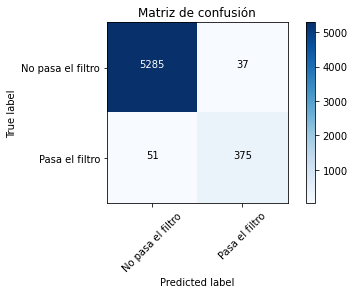

In [ ]:
########################################################################
#########          Logistic Regression

from sklearn.linear_model import LogisticRegression

# Train
model = LogisticRegression(random_state=421)
model.fit(X_train, y_train)
preds = model.predict(X_test)


# Evaluate
print(f'Accuracy = {accuracy_score(y_test,preds):.5f}\nRecall = {recall_score(y_test,preds):.4f}\n')
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm, ['No pasa el filtro','Pasa el filtro'],title='Matriz de confusión')